# Name : Ch Shanmukha Srinivas
# Roll : AM.EN.U4AIE22113


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random

{'CAT': ['ATG', 'ATT'], 'ATG': ['TGC'], 'TTC': ['TCC'], 'TCC': ['CCA'], 'TGC': ['GCA'], 'GCA': ['CAT'], 'ATT': ['TTC'], 'CCA': ['CAT']}


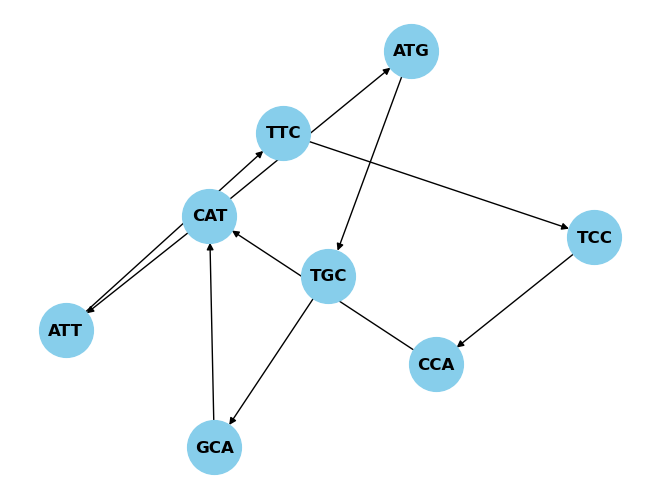

In [2]:
nodes=['CAT','ATG','TTC','TCC','TGC','GCA','ATT','CCA']
G=nx.DiGraph()
match=2
p=len(nodes[0])-match
graph={}
for i in nodes:
    graph[i]=[]
    suffix=i[p:]
    for j in nodes:
        if j[:match] == suffix:
            graph[i].append(j)
            G.add_edge(i,j)
print(graph)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, font_size=12, font_weight='bold')
plt.show()

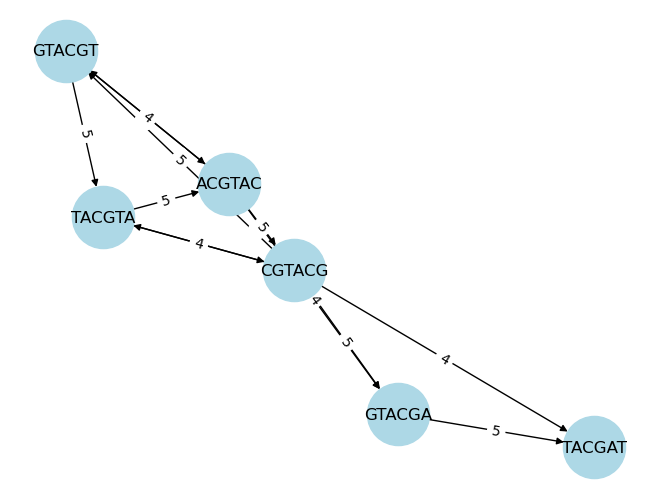

In [3]:
dna="GTACGTACGAT"
kmer=6
kmers = [dna[i:i+kmer] for i in range(len(dna) - kmer + 1)]
G=nx.DiGraph()
for match in range(4,kmer):
    p=len(kmers[0])-match
    for i in kmers:
        # print(i,i[p:],i[:match])
        suffix=i[p:]
        for j in kmers:
            if j[:match]==suffix:
                G.add_edge(i,j,weight=match)
pos = nx.spring_layout(G)  # Define the layout
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000,)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

In [15]:
kmers = []

with open("//home//shannu//Desktop//sem4//bio//input_2.txt") as f:
   lines = f.read()
kmers = lines.split("\n")

for i in kmers:
   for j in kmers:
       if i != j and i[1:] == j[:-1]:
           print(i + '--->' + j)

GCATG--->CATGC
CATGC--->ATGCG
AGGCA--->GGCAT
GGCAT--->GCATG


In [21]:
import itertools

def HamiltionPath(graph):
    Allp = get_all_permutation(graph.keys())
    for perm in Allp:
        # print(perm)
        if(isHamiltion(perm)):
            print("The hamiltion path is: " + str(perm))
            return True
    print("No Hamiltion path found")
    return False

def get_all_permutation(graph):
    perms  = itertools.permutations(graph)
    return perms
    
def isHamiltion(path):
    for i in range(len(graph)-1):
        if path[i+1] not in graph[path[i]]:
            return False
    return True

graph = {
    "a" : ["b","d","e"],
    "b" : ["a", "c"],
    "c" : ["b", "d"],
    "d" : ["a","c"],
    "e" : ["a"],
}
HamiltionPath(graph)


The hamiltion path is: ('b', 'c', 'd', 'a', 'e')


True

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

kmers = ["CAT","ATG", "TTC", "TCC","TGC","GCA","ATT","CCA"]
k =3
def create_overlap_graph(kmers):
    G = nx.DiGraph()
    for kmer in kmers:
        G.add_node(kmer)
    for i in range(len(kmers)):
        for j in range(len(kmers)):
            if i != j and kmers[i][1:] == kmers[j][:-1]:
                G.add_edge(kmers[i], kmers[j])
    return G

def HamiltionPath(graph):
    Allp = get_all_permutation(graph.keys())
    for perm in Allp:
        if(isHamiltion(perm)):
            # print("The hamiltion path is: " + str(perm))
            return perm
    print("No Hamiltion path found")
    return False

def get_all_permutation(graph):
    perms  = itertools.permutations(graph)
    return perms
    
def isHamiltion(path):
    for i in range(len(graph)-1):
        if path[i+1] not in graph[path[i]]:
            return False
    return True

overlap_graph = create_overlap_graph(kmers)
graph = dict()
for i in overlap_graph.edges:
    if i[0] not in graph.keys():
        graph.update({i[0]:[i[1]]})
    else:
        graph[i[0]].append(i[1])

path = HamiltionPath(graph)
print("The Hamiltion path is : " + str(path))
genome = ""
for i in path:
    genome += i[0]
genome += path[-1][1:3]
print(genome)

The Hamiltonian path is : ('ATG', 'TGC', 'GCA', 'CAT', 'ATT', 'TTC', 'TCC', 'CCA')
ATGCATTCCA


In [ ]:
kmers = []
kmer = "GTACGTACGAT"

for i in range(len(kmer) - 5):
    kmers.append(kmer[i:i+6])

def create_overlap_graph(kmers):
    G = nx.DiGraph()
    for kmer in kmers:
        G.add_node(kmer)
    for i in range(len(kmers)):
        for j in range(len(kmers)):
            if (i != j and kmers[i][1:] == kmers[j][:-1]):
                G.add_edge(kmers[i], kmers[j], weight = len(kmers[j])-1)
            elif  (i != j and kmers[i][2:] == kmers[j][:-2]):
                G.add_edge(kmers[i], kmers[j], weight = len(kmers[j])-2)
    return G

overlap_graph = create_overlap_graph(kmers)

graph = dict()
for i in overlap_graph.edges:
    print(i)
    if i[0] not in graph.keys():
        graph.update({i[0]:[i[1]]})
    elif i[1] not in graph.keys():
        graph.update({i[1]:[]})
    else:
        graph[i[0]].append(i[1])

print(graph)
path = HamiltionPath(graph)

print("The Hamiltion path is : " + str(path))
genome = ""
for i in path:
    genome += i[0]
genome += path[-1][1:6]
print(genome)


('GTACGT', 'TACGTA')
('GTACGT', 'ACGTAC')
('TACGTA', 'ACGTAC')
('TACGTA', 'CGTACG')
('ACGTAC', 'GTACGT')
('ACGTAC', 'CGTACG')
('ACGTAC', 'GTACGA')
('CGTACG', 'GTACGT')
('CGTACG', 'TACGTA')
('CGTACG', 'GTACGA')
('CGTACG', 'TACGAT')
('GTACGA', 'TACGAT')
{'GTACGT': ['TACGTA'], 'ACGTAC': ['GTACGT', 'CGTACG'], 'TACGTA': ['ACGTAC'], 'CGTACG': ['GTACGT', 'TACGTA', 'GTACGA'], 'GTACGA': ['TACGAT'], 'TACGAT': []}
The Hamiltion path is : ('GTACGT', 'TACGTA', 'ACGTAC', 'CGTACG', 'GTACGA', 'TACGAT')
GTACGTACGAT
